# Win Premier league-games


## Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('../artifacts/data.csv')
df.head()

,season_start_year,GW,id,team_h,team_a,train_score,label_1,label_X,label_2,home,...,tbl_home_nog_tbl_home_points_to_win,tbl_home_nog_tbl_home_points_to_cl,tbl_home_nog_tbl_home_points_to_euro,tbl_home_nog_tbl_home_points_to_regulation,tbl_away_nog_tbl_away_points_to_team_above,tbl_away_nog_tbl_away_points_to_team_below,tbl_away_nog_tbl_away_points_to_win,tbl_away_nog_tbl_away_points_to_cl,tbl_away_nog_tbl_away_points_to_euro,tbl_away_nog_tbl_away_points_to_regulation
0,22,3,29,18,20,train,1,0,0,TOT,...,-0.210526,0.000000,0.000000,0.421053,0.000000,0.105263,-0.210526,0.000000,0.000000,0.421053
1,22,3,22,7,2,train,1,0,0,CRY,...,-0.526316,-0.315789,-0.315789,0.105263,-0.105263,0.000000,-0.526316,-0.315789,-0.315789,0.105263
2,22,3,23,8,16,train,0,1,0,EVE,...,-0.631579,-0.421053,-0.421053,0.000000,-0.105263,0.000000,-0.631579,-0.421053,-0.421053,0.000000
3,22,3,24,9,4,train,1,0,0,FUL,...,-0.421053,-0.210526,-0.210526,0.210526,-0.105263,0.000000,-0.421053,-0.210526,-0.210526,0.210526
4,22,3,26,10,17,train,0,0,1,LEI,...,-0.526316,-0.315789,-0.315789,0.105263,0.000000,0.000000,-0.526316,-0.315789,-0.315789,0.105263


### Set label

In [3]:
label = "label_1"
remove_labels = ['label_X', 'label_2']

### Check Null and Dtypes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 72 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   season_start_year                                    1439 non-null   int64  
 1   GW                                                   1439 non-null   int64  
 2   id                                                   1439 non-null   int64  
 3   team_h                                               1439 non-null   int64  
 4   team_a                                               1439 non-null   int64  
 5   train_score                                          1439 non-null   object 
 6   label_1                                              1439 non-null   int64  
 7   label_X                                              1439 non-null   int64  
 8   label_2                                              1439 non-null  

### Adjust data

In [6]:
df = df.loc[df.train_score == "train"].drop(["rounds_left", "GW", 'id', 'team_h', 'team_a', 'train_score'] + remove_labels, axis=1)
df['season_start_year'] = df['season_start_year'].astype(str)
df.shape

(1439, 64)

### Check Missing values

In [7]:
df.isna().sum()

season_start_year                             0
label_1                                       0
home                                          0
away                                          0
kickoff_year                                  0
                                             ..
tbl_away_nog_tbl_away_points_to_team_below    0
tbl_away_nog_tbl_away_points_to_win           0
tbl_away_nog_tbl_away_points_to_cl            0
tbl_away_nog_tbl_away_points_to_euro          0
tbl_away_nog_tbl_away_points_to_regulation    0
Length: 64, dtype: int64

### Check Duplicates

In [8]:
df.duplicated().sum()

0

### Divide feature into arrays based on type

In [9]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 61 numerical features : ['label_1', 'kickoff_year', 'kickoff_month', 'win_share_latest_5_games_overall_home_team', 'draw_share_latest_5_games_overall_home_team', 'loss_share_latest_5_games_overall_home_team', 'avg_goals_scored_latest_5_games_overall_home_team', 'avg_goals_conceded_latest_5_games_overall_home_team', 'win_share_latest_5_games_overall_away_team', 'draw_share_latest_5_games_overall_away_team', 'loss_share_latest_5_games_overall_away_team', 'avg_goals_scored_latest_5_games_overall_away_team', 'avg_goals_conceded_latest_5_games_overall_away_team', 'win_share_latest_5_games_home_home_team', 'draw_share_latest_5_games_home_home_team', 'loss_share_latest_5_games_home_home_team', 'avg_goals_scored_latest_5_games_home_home_team', 'avg_goals_conceded_latest_5_games_home_home_team', 'win_share_latest_5_games_away_away_team', 'draw_share_latest_5_games_away_away_team', 'loss_share_latest_5_games_away_away_team', 'avg_goals_scored_latest_5_games_away_away_team', 'avg_goals_co

### Checking the number of unique values of each column

In [10]:
df.nunique()

season_start_year                               4
label_1                                         2
home                                           25
away                                           25
kickoff_year                                    5
                                             ... 
tbl_away_nog_tbl_away_points_to_team_below    235
tbl_away_nog_tbl_away_points_to_win           768
tbl_away_nog_tbl_away_points_to_cl            736
tbl_away_nog_tbl_away_points_to_euro          749
tbl_away_nog_tbl_away_points_to_regulation    730
Length: 64, dtype: int64

In [11]:
for i in categorical_features:
    print(df.groupby([i])['season_start_year'].count().sort_values(ascending = False))
    print("\n")

season_start_year
19    360
21    360
22    360
20    359
Name: season_start_year, dtype: int64


home
ARS    72
LEI    72
WHU    72
TOT    72
SOU    72
NEW    72
MUN    72
MCI    72
AVL    72
LIV    72
EVE    72
CRY    72
CHE    72
BHA    72
WOL    72
LEE    54
BUR    54
NOR    36
SHU    36
BRE    36
BOU    36
WAT    36
FUL    35
NFO    18
WBA    18
Name: season_start_year, dtype: int64


away
MUN    73
ARS    72
EVE    72
WHU    72
TOT    72
NEW    72
MCI    72
AVL    72
LIV    72
CRY    72
CHE    72
BHA    72
WOL    72
LEI    71
SOU    71
LEE    54
BUR    54
FUL    36
BRE    36
NOR    36
SHU    36
BOU    36
WAT    36
NFO    18
WBA    18
Name: season_start_year, dtype: int64




## Exploring Data

### Check statistics of data set

In [12]:
df.describe()

,label_1,kickoff_year,kickoff_month,win_share_latest_5_games_overall_home_team,draw_share_latest_5_games_overall_home_team,loss_share_latest_5_games_overall_home_team,avg_goals_scored_latest_5_games_overall_home_team,avg_goals_conceded_latest_5_games_overall_home_team,win_share_latest_5_games_overall_away_team,draw_share_latest_5_games_overall_away_team,...,tbl_home_nog_tbl_home_points_to_win,tbl_home_nog_tbl_home_points_to_cl,tbl_home_nog_tbl_home_points_to_euro,tbl_home_nog_tbl_home_points_to_regulation,tbl_away_nog_tbl_away_points_to_team_above,tbl_away_nog_tbl_away_points_to_team_below,tbl_away_nog_tbl_away_points_to_win,tbl_away_nog_tbl_away_points_to_cl,tbl_away_nog_tbl_away_points_to_euro,tbl_away_nog_tbl_away_points_to_regulation
count,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,...,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000
mean,0.435719,2021.069493,6.428770,0.378098,0.233901,0.388001,1.366736,1.386681,0.389148,0.233148,...,-410.131616,-157.038111,-74.390512,188.654877,-35.174957,34.989649,-410.131616,-157.038111,-74.390512,188.654877
std,0.496023,1.245032,3.885214,0.252294,0.197231,0.251538,0.708092,0.640298,0.254932,0.196212,...,502.513097,301.354330,262.323041,322.854005,74.742750,72.305780,502.513097,301.354330,262.323041,322.854005
min,0.000000,2019.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2455.578947,-1657.210526,-1405.026316,-468.342105,-676.973684,0.000000,-2455.578947,-1657.210526,-1405.026316,-468.342105
25%,0.000000,2020.000000,3.000000,0.200000,0.000000,0.200000,0.800000,1.000000,0.200000,0.000000,...,-658.671053,-231.578947,-128.421053,2.105263,-34.815789,0.000000,-658.671053,-231.578947,-128.421053,2.105263
50%,0.000000,2021.000000,5.000000,0.400000,0.200000,0.400000,1.200000,1.400000,0.400000,0.200000,...,-185.684211,-47.368421,-9.552632,47.157895,-7.578947,7.605263,-185.684211,-47.368421,-9.552632,47.157895
75%,1.000000,2022.000000,10.000000,0.600000,0.400000,0.600000,1.800000,1.800000,0.600000,0.400000,...,-22.184211,-1.184211,0.223684,256.736842,0.000000,32.894737,-22.184211,-1.184211,0.223684,256.736842
max,1.000000,2023.000000,12.000000,1.000000,1.000000,1.000000,4.200000,4.000000,1.000000,1.000000,...,0.000000,1057.263158,1247.263158,2012.210526,0.000000,699.684211,0.000000,1057.263158,1247.263158,2012.210526


### Correlation

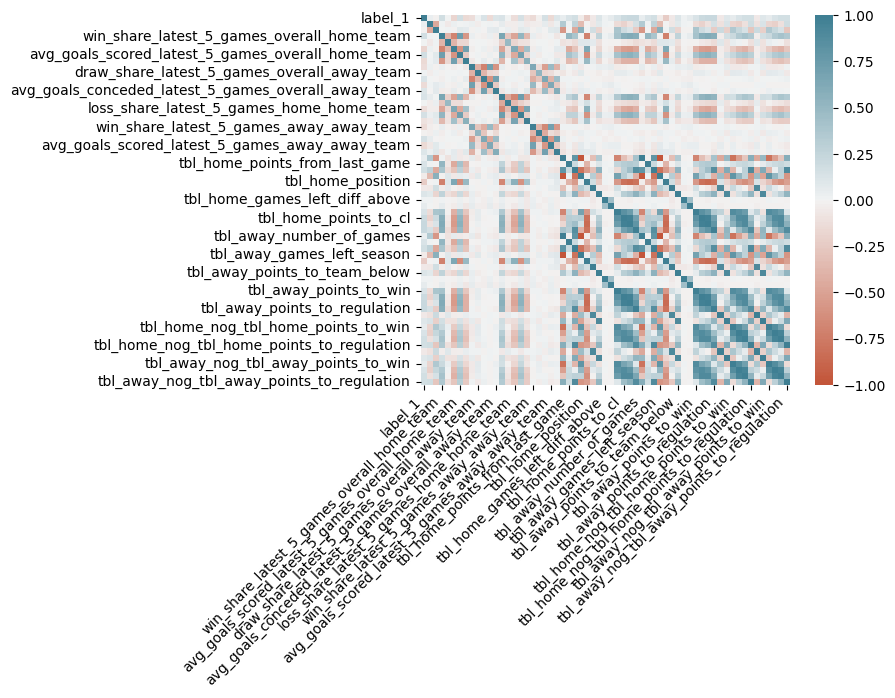

In [13]:
import seaborn as sns

corr = df[numeric_features].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [16]:
corr.sort_values('label_1', ascending=False)['label_1'].head(20)

label_1                                              1.000000
tbl_away_points_to_euro                              0.221405
tbl_home_points_to_euro                              0.221405
tbl_away_points_to_regulation                        0.220212
tbl_home_points_to_regulation                        0.220212
tbl_away_points_to_cl                                0.202265
tbl_home_points_to_cl                                0.202265
win_share_latest_5_games_overall_home_team           0.179390
avg_goals_scored_latest_5_games_overall_home_team    0.172233
tbl_home_team_points                                 0.171587
tbl_away_team_points                                 0.171587
tbl_home_nog_tbl_home_points_to_regulation           0.170548
tbl_away_nog_tbl_away_points_to_regulation           0.170548
tbl_away_nog_tbl_away_points_to_euro                 0.163375
tbl_home_nog_tbl_home_points_to_euro                 0.163375
avg_goals_scored_latest_5_games_home_home_team       0.153626
loss_sha

### Plot features against target

In [ ]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

def plot_feature_against_target(df, feature, target):
    
    if is_string_dtype(df[feature]) or (is_numeric_dtype(df[feature]) and len(df[feature].unique()) <= 13):
        dfg = df.groupby(feature).agg(
            mean = (target, np.mean),
            n = (target, np.size))
        #ax = dfg.plot.bar(figsize=(15, 7.5), ylabel='Average target', title = feature)
        dfg.plot(figsize=(15, 7.5), kind='bar', secondary_y= 'n', rot= 0, title = feature)
        print(dfg.sort_values('mean'))
        
    elif is_numeric_dtype(df[feature]):
        
        bins = np.nanpercentile(df[feature], [0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 95, 100])
        bins = [i for n, i in enumerate(bins) if i not in bins[:n]]
        bins[0] = np.floor(bins[0])
        bins[-1] = np.ceil(bins[-1])
        
        df_temp = pd.DataFrame({feature: df[feature], target: df[target]})
        df_temp[feature+'_bins'] = pd.cut(pd.to_numeric(df[feature]), bins, include_lowest=True)
        
        dfg = df_temp.groupby(feature+'_bins').agg(
            mean = (target, np.mean),
            n = (target, np.size))
        #ax = dfg.plot.bar(figsize=(15, 7.5), ylabel='Average target', title = feature)
        dfg.plot(figsize=(15, 7.5), kind='bar', secondary_y= 'n', rot= 0, title = feature)
        print(dfg)

        
    plt.show()

In [ ]:
features = categorical_features + numeric_features
for p in features:
    plot_feature_against_target(df, p, label)